### END 2 END NPL PROJECT
+ Emotion detection in text 
+ textclassifier

In [20]:
# load EDA PKGS
import pandas as pd 
import numpy as np 

In [21]:
#load data viz pkgs
import seaborn as sns

In [22]:
#load text cleaning pkgs
import neattext.functions as nfx

In [23]:
#load ml pkgs
#Estimators
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

#transformers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix


In [24]:
#load dataset
df = pd.read_csv("data/emotion_dataset_raw.csv")

In [25]:
df.head()

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [26]:
df['Emotion'].value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

<AxesSubplot:xlabel='Emotion', ylabel='count'>

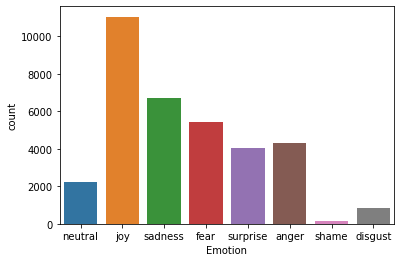

In [27]:
#plot
sns.countplot(x='Emotion',data=df)

In [28]:
#data cleaning
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [29]:
df['Text']

0                                                   Why ? 
1          Sage Act upgrade on my to do list for tommorow.
2        ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3         Such an eye ! The true hazel eye-and so brill...
4        @Iluvmiasantos ugh babe.. hugggzzz for u .!  b...
                               ...                        
34787    @MichelGW have you gift! Hope you like it! It'...
34788    The world didnt give it to me..so the world MO...
34789                             A man robbed me today . 
34790    Youu call it JEALOUSY, I call it of #Losing YO...
34791    I think about you baby, and I dream about you ...
Name: Text, Length: 34792, dtype: object

In [30]:
#user handles
df['Clean_Text'] =df['Text'].apply(nfx.remove_userhandles)

In [31]:
#stopwords
df['Clean_Text'] =df['Text'].apply(nfx.remove_stopwords)

In [32]:
#stopwords
df['Clean_Text'] =df['Text'].apply(nfx.remove_special_characters)

In [33]:
df

,Emotion,Text,Clean_Text
0,neutral,Why ?,Why
1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade on my to do list for tommorow
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,ON THE WAY TO MY HOMEGIRL BABY FUNERAL MAN I H...
3,joy,Such an eye ! The true hazel eye-and so brill...,Such an eye The true hazel eyeand so brillia...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,Iluvmiasantos ugh babe hugggzzz for u babe n...
...,...,...,...
34787,surprise,@MichelGW have you gift! Hope you like it! It'...,MichelGW have you gift Hope you like it Its ha...
34788,joy,The world didnt give it to me..so the world MO...,The world didnt give it to meso the world MOST...
34789,anger,A man robbed me today .,A man robbed me today
34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO...",Youu call it JEALOUSY I call it of Losing YOU


In [35]:
#features & labels
xfeatures = df['Clean_Text']
ylabels=df['Emotion']

In [36]:
#split data
x_train,x_test,y_train,y_test = train_test_split(xfeatures,ylabels,test_size=0.3,random_state=42)

In [37]:
#build pipline
from sklearn.pipeline import Pipeline

In [38]:
# logisticregression pipline
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])

In [39]:
#train and fit data
pipe_lr.fit(x_train,y_train)

C:\Users\edr\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [40]:
pipe_lr

Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [41]:
#check accuracy
pipe_lr.score(x_test,y_test)

0.633742096187009

In [43]:
#make a predication
ex1 = "this book is so interesting it made me happy"

In [44]:
pipe_lr.predict([ex1])

array(['joy'], dtype=object)

In [45]:
#prediction prob
pipe_lr.predict_proba([ex1])

array([[3.91431747e-03, 7.91416802e-03, 1.29456077e-03, 9.07667993e-01,
        1.93326204e-03, 1.15383006e-02, 3.34757123e-05, 6.57039226e-02]])

In [46]:
#to know the classes
pipe_lr.classes_

array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'shame',
       'surprise'], dtype=object)

In [48]:
#save model and pipline
import joblib
Pipeline_file = open("emotion_classifier_pip_lr_03_june_2021.pkl","wb")
joblib.dump(pipe_lr,Pipeline_file)
Pipeline_file.close()